# Final Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.tree as skt
import sklearn.ensemble as skens
from scipy import stats

## Introduction

### Background

In this assignment, we will analyze two data sets from "Wolves and Moose of Isle Royale" project. The data sets contain information about the populations of wolves and moose on Isle Royale, an island in Lake Superior. The data sets include information about the number of wolves and moose on the island, as well as other variables that may be related to the populations of wolves and moose.

> Isle Royale is a remote wilderness island, isolated by the frigid waters of Lake Superior, and home to populations of wolves and moose. As predator and prey, their lives and deaths are linked in a drama that is timeless and historic. Their lives are historic because we have been documenting their lives for more than five decades. This research project is the longest continuous study of any predator-prey system in the world. ([Source](https://isleroyalewolf.org/overview/overview/at_a_glance.html))

Here is the [Annual Report](https://isleroyalewolf.org/sites/default/files/annual-report-pdf/WolfMooseReport_2024_final-web.pdf) to learn more about the project.

In [2]:
wolf_moose_yearly = pd.read_csv("https://github.com/UM-Data-Science-101/final-project/raw/refs/heads/main/wolf_moose_yearly.csv", na_values = ["NA", "N/A", "N/A yet", "NA yet"])
moose_deaths = pd.read_csv("https://github.com/UM-Data-Science-101/final-project/raw/refs/heads/main/moose_deaths.csv")

The `wolf_moose_yearly` data set contains yearly counts of wolf and moose population, along with variables about the environment and other factors that may be related to the populations. The `moose_deaths` data set contains information about the age and size of decreased moose on Isle Royale.

Columns and Rows in Data Set:

In [3]:
print(f"Wolf-Moose Yearly Dataset: {wolf_moose_yearly.shape[0]} rows, {wolf_moose_yearly.shape[1]} columns")
print(f"Moose Deaths Dataset: {moose_deaths.shape[0]} rows, {moose_deaths.shape[1]} columns")

print("\nWolf-Moose Yearly Dataset Columns:")
print(wolf_moose_yearly.columns.tolist())

print("\nMoose Deaths Dataset Columns:")
print(moose_deaths.columns.tolist())

Wolf-Moose Yearly Dataset: 61 rows, 15 columns
Moose Deaths Dataset: 662 rows, 8 columns

Wolf-Moose Yearly Dataset Columns:
['year', 'wolves', 'moose', 'kill rate', 'predation rate', 'moose recruitment rate', 'moose mean age excluding calves', 'July-Sept (temp, F)', 'Apr-May (temp, F)', 'Jan-Feb (temp, F)', 'May-Aug (precip, inches)', 'NAO (DJFM - station based)', 'NAO - annual', 'snow.depth (cm)', 'ice bridges (0=none, 1 = present)']

Moose Deaths Dataset Columns:
['Sex', 'Year of birth', 'Cranial Volume (cm3)', 'Winter temperature (standardized)', 'Moose abundance (standardized)', 'Wolf abundance (standardized)', 'Winter temperature (categorical)', 'Age at death']


### Codebook

These data do not include a code-book, but there is written documentation on many of the concepts of what is measured on the [Data & Interpretation](https://isleroyalewolf.org/data/data/home.html) page from the Isle Royale project. For the "NAO" columns, see [this page](https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-station-based).

**Task**: Create own codebook using this template:

* Variable Name:
* Description:
* Type: (e.g., numeric, categorical, etc.)

If there are several variables that are essentially the same, you may summarize them together as a single entry. Not all of the variables are perfectly described in the online documents (an all too common issue). In those situations, provide your interpretation of as best you can.

In [4]:
wolf_moose_codebook = pd.DataFrame({
    'Variable Name': [
        'year', 'wolves', 'moose', 'kill rate', 'predation rate', 'moose recruitment rate',
        'moose mean age excluding calves', 'July-Sept (temp, F)', 'Apr-May (temp, F)',
        'Jan-Feb (temp, F)', 'May-Aug (precip, inches)', 'NAO (DJFM - station based)',
        'NAO - annual', 'snow.depth (cm)', 'ice bridges (0=none, 1 = present)'
    ],
    'Description': [
        'Calendar year of observation',
        'Number of wolves counted that year on Isle Royale',
        'Number of moose counted that year on Isle Royale',
        'Number of moose killed per wolf per month',
        'Percentage of moose population killed by wolves per year',
        'Proportion of the moose population that are calves',
        'Average age of moose population excluding calves',
        'Average temperature in Fahrenheit during summer months (July-September)',
        'Average temperature in Fahrenheit during spring months (April-May)',
        'Average temperature in Fahrenheit during winter months (January-February)',
        'Total precipitation in inches during growing season (May-August)',
        'North Atlantic Oscillation index for winter months (Dec-March), station-based measurement',
        'Annual North Atlantic Oscillation index',
        'Average snow depth in centimeters',
        'Presence of ice bridges connecting Isle Royale to mainland (binary: 0=none, 1=present)'
    ],
    'Type': [
        'Numeric (Integer)', 'Numeric (Integer)', 'Numeric (Integer)', 'Numeric (Float)',
        'Numeric (Float)', 'Numeric (Float)', 'Numeric (Float)', 'Numeric (Float)',
        'Numeric (Float)', 'Numeric (Float)', 'Numeric (Float)', 'Numeric (Float)',
        'Numeric (Float)', 'Numeric (Float)', 'Categorical (Binary)'
    ]
})

moose_deaths_codebook = pd.DataFrame({
    'Variable Name': [
        'Sex', 'Year of birth', 'Cranial Volume (cm3)', 'Winter temperature (standardized)',
        'Moose abundance (standardized)', 'Wolf abundance (standardized)',
        'Winter temperature (categorical)', 'Age at death'
    ],
    'Description': [
        'Biological sex of the moose',
        'Calendar year when the moose was born',
        'Volume of the moose skull in cubic centimeters, indicating size/development',
        'Standardized measure of winter temperature during moose\'s life',
        'Standardized measure of moose population size during moose\'s life',
        'Standardized measure of wolf population size during moose\'s life',
        'Categorical classification of winter temperature (cold/warm)',
        'Age of moose when it died, in years'
    ],
    'Type': [
        'Categorical', 'Numeric (Integer)', 'Numeric (Float)', 'Numeric (Float)',
        'Numeric (Float)', 'Numeric (Float)', 'Categorical', 'Numeric (Integer)'
    ]
})
print("Wolf-Moose Yearly Dataset Codebook:")
display(wolf_moose_codebook)

print("\nMoose Deaths Dataset Codebook:")
display(moose_deaths_codebook)

Wolf-Moose Yearly Dataset Codebook:


,Variable Name,Description,Type
0,year,Calendar year of observation,Numeric (Integer)
1,wolves,Number of wolves counted that year on Isle Royale,Numeric (Integer)
2,moose,Number of moose counted that year on Isle Royale,Numeric (Integer)
3,kill rate,Number of moose killed per wolf per month,Numeric (Float)
4,predation rate,Percentage of moose population killed by wolve...,Numeric (Float)
5,moose recruitment rate,Proportion of the moose population that are ca...,Numeric (Float)
6,moose mean age excluding calves,Average age of moose population excluding calves,Numeric (Float)
7,"July-Sept (temp, F)",Average temperature in Fahrenheit during summe...,Numeric (Float)
8,"Apr-May (temp, F)",Average temperature in Fahrenheit during sprin...,Numeric (Float)
9,"Jan-Feb (temp, F)",Average temperature in Fahrenheit during winte...,Numeric (Float)



Moose Deaths Dataset Codebook:


,Variable Name,Description,Type
0,Sex,Biological sex of the moose,Categorical
1,Year of birth,Calendar year when the moose was born,Numeric (Integer)
2,Cranial Volume (cm3),Volume of the moose skull in cubic centimeters...,Numeric (Float)
3,Winter temperature (standardized),Standardized measure of winter temperature dur...,Numeric (Float)
4,Moose abundance (standardized),Standardized measure of moose population size ...,Numeric (Float)
5,Wolf abundance (standardized),Standardized measure of wolf population size d...,Numeric (Float)
6,Winter temperature (categorical),Categorical classification of winter temperatu...,Categorical
7,Age at death,"Age of moose when it died, in years",Numeric (Integer)


### Data Cleaning


In [5]:
print("Missing values in Wolf-Moose Yearly Dataset:")
print(wolf_moose_yearly.isnull().sum())

print("\nMissing values in Moose Deaths Dataset:")
print(moose_deaths.isnull().sum())


Missing values in Wolf-Moose Yearly Dataset:
year                                  0
wolves                                0
moose                                 0
kill rate                            13
predation rate                       13
moose recruitment rate                3
moose mean age excluding calves      12
July-Sept (temp, F)                   1
Apr-May (temp, F)                     0
Jan-Feb (temp, F)                     0
May-Aug (precip, inches)              1
NAO (DJFM - station based)            1
NAO - annual                          2
snow.depth (cm)                      16
ice bridges (0=none, 1 = present)     0
dtype: int64

Missing values in Moose Deaths Dataset:
Sex                                  0
Year of birth                        0
Cranial Volume (cm3)                 0
Winter temperature (standardized)    0
Moose abundance (standardized)       0
Wolf abundance (standardized)        0
Winter temperature (categorical)     0
Age at death                

Strategy for dealing with missing values in each data set:

**For the kill rate and predation rate, I replaced the missing value with the column mean. For the moose recruitment rate and mean age we can assume that they are pretty close the previous years so we can use the forward fill method. For the missing enviromental values, I just filled it in with the column median to avoid the influence of outliers.**

In [6]:
wolf_moose_filled = wolf_moose_yearly.copy()

wolf_moose_filled['kill rate'] = wolf_moose_yearly['kill rate'].fillna(wolf_moose_yearly['kill rate'].mean())
wolf_moose_filled['predation rate'] = wolf_moose_yearly['predation rate'].fillna(wolf_moose_yearly['predation rate'].mean())


cols_to_ffill = ['moose recruitment rate', 'moose mean age excluding calves']
wolf_moose_filled[cols_to_ffill] = wolf_moose_yearly[cols_to_ffill].ffill()


env_cols = ['July-Sept (temp, F)', 'Apr-May (temp, F)', 'Jan-Feb (temp, F)',
            'May-Aug (precip, inches)', 'NAO (DJFM - station based)',
            'NAO - annual', 'snow.depth (cm)']
for col in env_cols:
    if wolf_moose_yearly[col].isna().sum() > 0:
        wolf_moose_filled[col] = wolf_moose_yearly[col].fillna(wolf_moose_yearly[col].median())

print(wolf_moose_filled.isnull().sum().sum(), "missing values remain in Wolf-Moose dataset")

0 missing values remain in Wolf-Moose dataset


## Exploratory Data Analysis

### Univariate Exploration

#### Categorical Variable

Distribution of Sex in Moose Deaths Dataset:
        Count  Percentage(%)
Sex                         
Male      346      52.265861
Female    316      47.734139


Text(0, 0.5, 'Count')

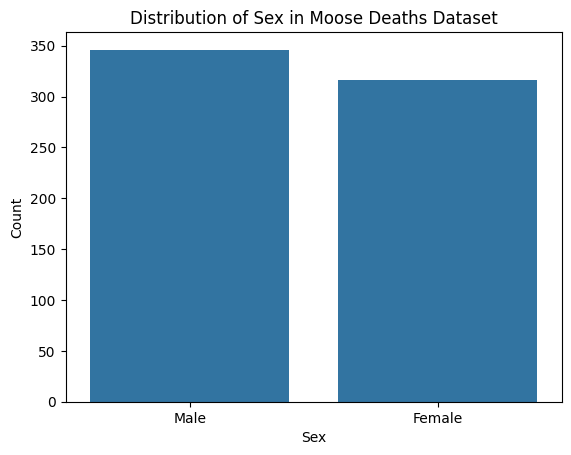

In [7]:
print("Distribution of Sex in Moose Deaths Dataset:")
sex_counts = moose_deaths['Sex'].value_counts()
sex_percentage = moose_deaths['Sex'].value_counts(normalize=True) * 100

sex_summary = pd.DataFrame({
    'Count': sex_counts,
    'Percentage(%)': sex_percentage
})
print(sex_summary)

ax = sb.countplot(x='Sex', data=moose_deaths)
plt.title('Distribution of Sex in Moose Deaths Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')

**The majority of moose that died on Isle Royale are male with about 52%. There were slightly fewer female deaths. 346 males died while 316 females died.**

#### Numeric Variable

Distribution of Cranial Volume in Moose Deaths Dataset:
count     662.000000
mean     1737.115421
std       251.718047
min      1073.063000
25%      1541.784250
50%      1694.415000
75%      1935.307750
max      2472.569000
Name: Cranial Volume (cm3), dtype: float64
Skewness: 0.31743661240508775


Text(0, 0.5, 'Frequency')

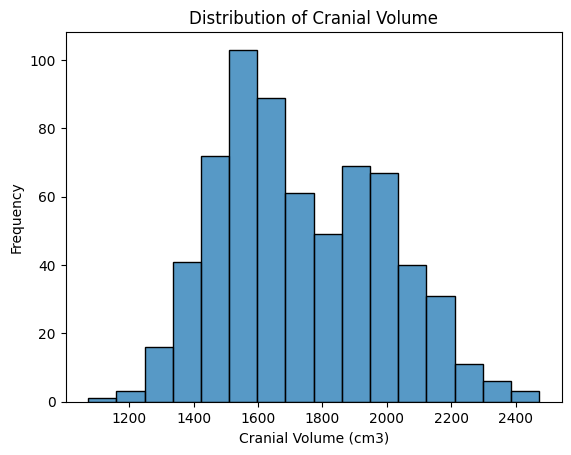

In [8]:
print("Distribution of Cranial Volume in Moose Deaths Dataset:")

cranial_stats = moose_deaths['Cranial Volume (cm3)'].describe()
print(cranial_stats)

skewness = stats.skew(moose_deaths['Cranial Volume (cm3)'].dropna())
print(f"Skewness: {skewness}")


sb.histplot(moose_deaths['Cranial Volume (cm3)'])
plt.title('Distribution of Cranial Volume')
plt.xlabel('Cranial Volume (cm3)')
plt.ylabel('Frequency')

**The distribution of cranial volume is slightly skewed right with a mean of 1737 and a median of 1694 cm3. The skewness coefficent is 0.317. The smallest number in the data set was 1073 while the largest in the data set was 2472. This makes for a range of 1399.**

### Multivariate Exploration




#### Categorical-Categorical

Cross-tabulation between Sex and Winter temperature:
Winter temperature (categorical)  cold  warm  Total
Sex                                                
Female                             167   149    316
Male                               174   172    346
Total                              341   321    662

Percentage distribution by Sex:
Winter temperature (categorical)       cold       warm
Sex                                                   
Female                            52.848101  47.151899
Male                              50.289017  49.710983


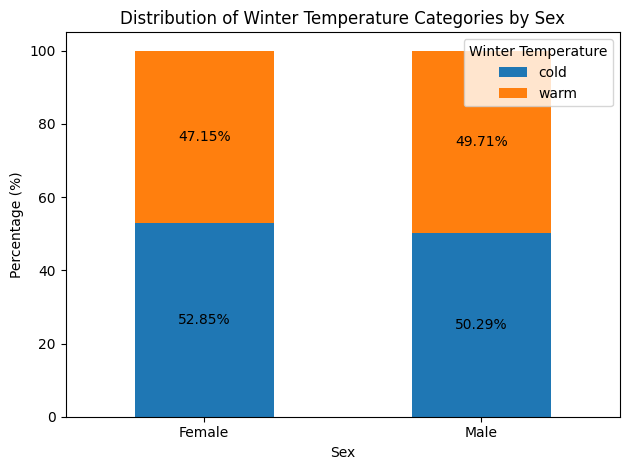

In [9]:
print("Cross-tabulation between Sex and Winter temperature:")
cross_tab = pd.crosstab(moose_deaths['Sex'], moose_deaths['Winter temperature (categorical)'], margins=True, margins_name="Total")
print(cross_tab)

cross_tab_pct = pd.crosstab(moose_deaths['Sex'], moose_deaths['Winter temperature (categorical)'], normalize='index') * 100
print("\nPercentage distribution by Sex:")
print(cross_tab_pct)

cross_tab_pct_plot = pd.crosstab(moose_deaths['Sex'],
                               moose_deaths['Winter temperature (categorical)'],
                               normalize='index') * 100

ax = cross_tab_pct_plot.plot(kind='bar', stacked=True)
plt.title('Distribution of Winter Temperature Categories by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage (%)')
plt.legend(title='Winter Temperature')
plt.xticks(rotation=0)
for i, (sex, row) in enumerate(cross_tab_pct_plot.iterrows()):
    cumulative = 0
    for col, val in row.items():
        plt.text(i, cumulative + val/2, f"{val:.2f}%", ha='center', va='center')
        cumulative += val

plt.tight_layout()
plt.show()

**I see that males die in the cold and warm weather pretty evenly: 49.71% vs. 50.29%. Females, however, tend to die very slightly more in the cold than in the warm: 52.85% vs 47.15%. However, regardless of weather, there are more male deaths than female deaths. 174 vs 167 in the cold and 172 vs 149 in the warm.**

#### Categorical-Numeric

Kill Rate Statistics by Ice Bridge Presence:
            count      mean       std    min      25%       50%       75%  \
ice_bridge                                                                  
0            35.0  0.754498  0.317313  0.217  0.52800  0.724000  0.845500   
1            26.0  0.739595  0.235991  0.298  0.62075  0.748146  0.781036   

              max  
ice_bridge         
0           1.428  
1           1.383  


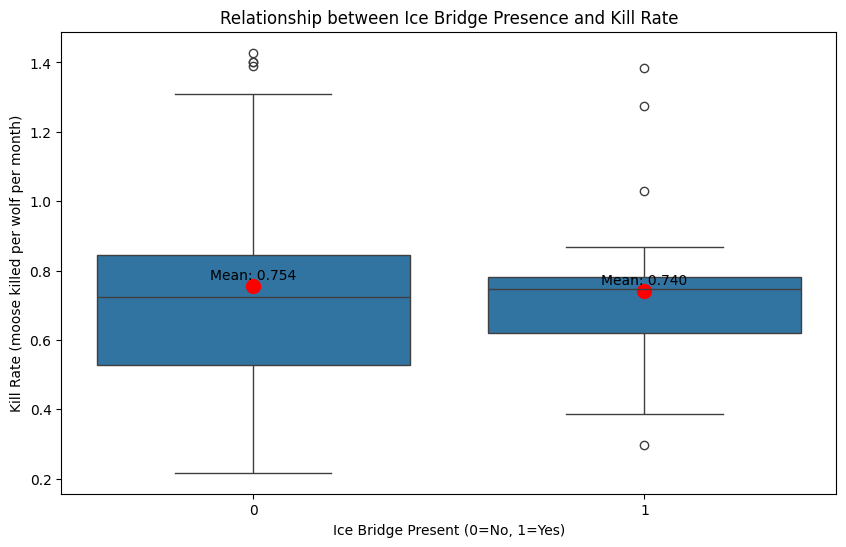

In [10]:
wolf_moose_filled['ice_bridge'] = wolf_moose_filled['ice bridges (0=none, 1 = present)']

bridge_stats = wolf_moose_filled.groupby('ice_bridge')['kill rate'].describe()
print("Kill Rate Statistics by Ice Bridge Presence:")
print(bridge_stats)

plt.figure(figsize=(10, 6))
sb.boxplot(x='ice_bridge', y='kill rate', data=wolf_moose_filled)
plt.title('Relationship between Ice Bridge Presence and Kill Rate')
plt.xlabel('Ice Bridge Present (0=No, 1=Yes)')
plt.ylabel('Kill Rate (moose killed per wolf per month)')

means = wolf_moose_filled.groupby('ice_bridge')['kill rate'].mean()
plt.plot([0, 1], means, 'ro', ms=10, label='Mean')
for i, mean in enumerate(means):
    plt.text(i, mean + 0.02, f"Mean: {mean:.3f}", ha='center')

**I notice that the mean kill rate of moose killed per month is very close in the presence of an ice bridge vs. no ice bridge. They are both around 0.75 moose killed per wolf per month. However, where there is an ice bridge present, there seems to be less variation of the kill rate. The IQR for no ice bridge is 0.32 while it's 0.16 for when an ice bridge is present.**

#### Numeric-Numeric

Correlation between Wolf and Moose Populations:
          wolves     moose
wolves  1.000000 -0.342434
moose  -0.342434  1.000000

Descriptive Statistics:
          wolves        moose
count  61.000000    61.000000
mean   21.065574  1020.639344
std     9.998115   434.493883
min     2.000000   385.000000
25%    15.000000   750.000000
50%    21.000000   975.000000
75%    25.000000  1203.000000
max    50.000000  2398.000000


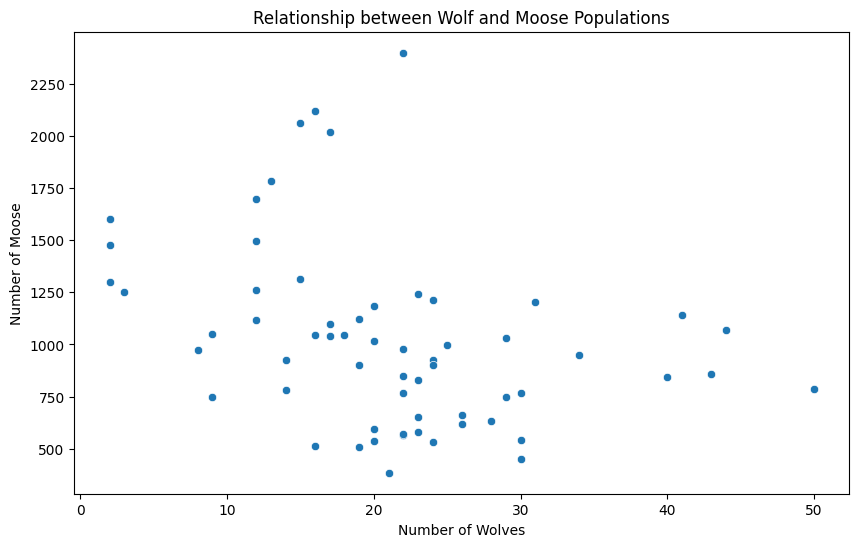

In [11]:
print("Correlation between Wolf and Moose Populations:")
correlation = wolf_moose_filled[['wolves', 'moose']].corr()
print(correlation)

plt.figure(figsize=(10, 6))
sb.scatterplot(x='wolves', y='moose', data=wolf_moose_filled)
plt.title('Relationship between Wolf and Moose Populations')
plt.xlabel('Number of Wolves')
plt.ylabel('Number of Moose')

print("\nDescriptive Statistics:")
print(wolf_moose_filled[['wolves', 'moose']].describe())

**I notice that there is a slight negative correlation between the number of wolves and the island and number of moose(-0.34). Sinve the correlation is not very strong, there are some outliers like one time there were 2398 moose with only about 22 wolves. There are a significantly greater number of moose than wolves on the island. There are an average of 21 wolves vs. an average of 1020 moose.**

### Summary

**We found that there are very slightly more male deaths than female moose deaths on the island. We found that the distribution of cranial volume for deceased is slightly skewed right so I wonder if there is a relationship between small cranial volume and increased number of moose deaths. The weather didn't seem to matter much when it came to comparing deaths by sex. They were approximately 50-50 whether it was cold or warm. The average kill rate did not seem to depend on whether there was an ice bridge or not. However, the kill rate varied a lot more when there was no ice bridge. There was a slight megative correlation between number of wolves and moose deaths. I would like to investigate this more to see if this relationship is statistically significant.**

## Inference


### Population and Sampling


**The populations of interest in this study are the entire moose and wolf population on Isle Royale, as well as the enviromental factors on the island. The sample in the data is the number of moose and wolves counted in the census, the weather on the island, as well as the number of moose deaths researchers discovered. The relationship between the population and the sample is temporal since they are data points at a single point in time. This sample would allow us to make inferences about the relationships between enviromental fators and the predator and prey dynamic between the wolf and the moose.**

### Hypothesis Testing

#### Theory

**Task**: give a theory you would like to test about the population you identified in the previous section. Explain how you can use the format of a hypothesis to test that theory. Clearly describe the population parameter, parameter space, null hypothesis, and alternative hypothesis you will use to test this theory.

**I would like to test the theory that there is a statistically significant relationship between number of wolves on the island and number of moose. I would like to hypothesize that as the number of wolves increase, the number of moose decrease because the wolves are killing the moose.**

**Population parameter: The correlation coefficent between the wolf and moose populations on Isle Royale over all time.**

**Parameter space: The correlation coefficent can be anything from -1 to 0 to 1, ranging from perfect negative correlation to no correlation to perfect positive correlation.**

**Null Hypothesis: correlation coefficent = 0, there is no relationship between number of wolves and number of moose on the island.**

**Alternative hypothesis: correlation coefficent is less than 0.**

#### Application


In [12]:
alpha = 0.05

wolf_pop = wolf_moose_filled['wolves']
moose_pop = wolf_moose_filled['moose']

correlation = np.corrcoef(wolf_pop, moose_pop)[0, 1]
n = len(wolf_pop)
t_stat = correlation * np.sqrt((n-2) / (1 - correlation**2))
p_value = stats.t.cdf(t_stat, n-2)

print(f"Correlation coefficient (r): {correlation}")
print(f"Sample size: {n}")
print(f"t-statistic: {t_stat}")
print(f"p-value (one-tailed): {p_value}")
print(f"Significance level (α): {alpha}")

Correlation coefficient (r): -0.3424343905018952
Sample size: 61
t-statistic: -2.799544011849473
p-value (one-tailed): 0.0034527447226823235
Significance level (α): 0.05


**Since the one tailed p-value is less than the significant level of 0.05, we have sufficent evidence to reject the null hypothesis that there is no relationship between number of wolves and number of moose on Isle Royale.**

### Confidence Interval

#### Theory


**I would like to look at the mean age of moose death.**

**Population parameter: true mean age of moose death on Isle Royale.**

**Confidence level: 95%**

**I will create a confidence interval with a 95% confidence level. Meaning, if we were to create many, many confidence intervals, about 95% of them would contain the true population proportion.**

#### Application

In [13]:
moose_age = moose_deaths['Age at death']

n = len(moose_age)
mean_age = moose_age.mean()
std_dev = moose_age.std()
std_error = std_dev / np.sqrt(n)

confidence_level = 0.95
alpha = 1 - confidence_level

df = n - 1
t_critical = stats.t.ppf(1 - alpha/2, df)

margin_of_error = t_critical * std_error

lower_bound = mean_age - margin_of_error
upper_bound = mean_age + margin_of_error

print(f"Sample Mean Age at Death: {mean_age} years")
print(f"Sample Standard Deviation: {std_dev} years")
print(f"Sample Size: {n}")
print(f"Standard Error: {std_error}")
print(f"Degrees of Freedom: {df}")
print(f"t-critical value (95% confidence): {t_critical}")
print(f"Margin of Error: {margin_of_error}")
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}] years")

Sample Mean Age at Death: 11.299093655589123 years
Sample Standard Deviation: 3.486472552103471 years
Sample Size: 662
Standard Error: 0.13550560381591212
Degrees of Freedom: 661
t-critical value (95% confidence): 1.963559365975421
Margin of Error: 0.26607329751488895
95% Confidence Interval: [11.033020358074234, 11.565166953104013] years


**We are 95% confident that the true population parameter of mean age of moose death is in between 11.03 and 11.56 years.**

**This tells us that the most on the island are living around an average of 11.03-11.56 years before dying.**

### Regression

#### Theory

Linear regression is a statistical method that models the relationship between the conditional mean of an outcome and one or more predictors as a linear function:

$$E(Y \mid x_1, x_2, \ldots ) = a + b_1 x_1 + b_2 x_2 + \ldots $$


**I would like to look at how the moose population size is affected by 3 predictors: the wolf population, the winter temperature and the snow depth.**

**If b1 = 0, then the wolf population would have no effect on moose population size. If b2 = 0, how cold the winter is would have no effect on the winter temperature. If b3 = 0, how deep the snow is would have no effect on the winter temperature.**

**We can use linear regression to see whether or not these variables are correlated and gain more insight into what is actually affecting the moose population on Isle Royale.**

**E(moose population | wolf population, winter temp, snow depth) = b0 + b1 + b2 + b3**

#### Application


                            OLS Regression Results                            
Dep. Variable:                  moose   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     3.430
Date:                Sat, 22 Nov 2025   Prob (F-statistic):             0.0229
Time:                        20:04:28   Log-Likelihood:                -451.51
No. Observations:                  61   AIC:                             911.0
Df Residuals:                      57   BIC:                             919.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1056.0949    274.23

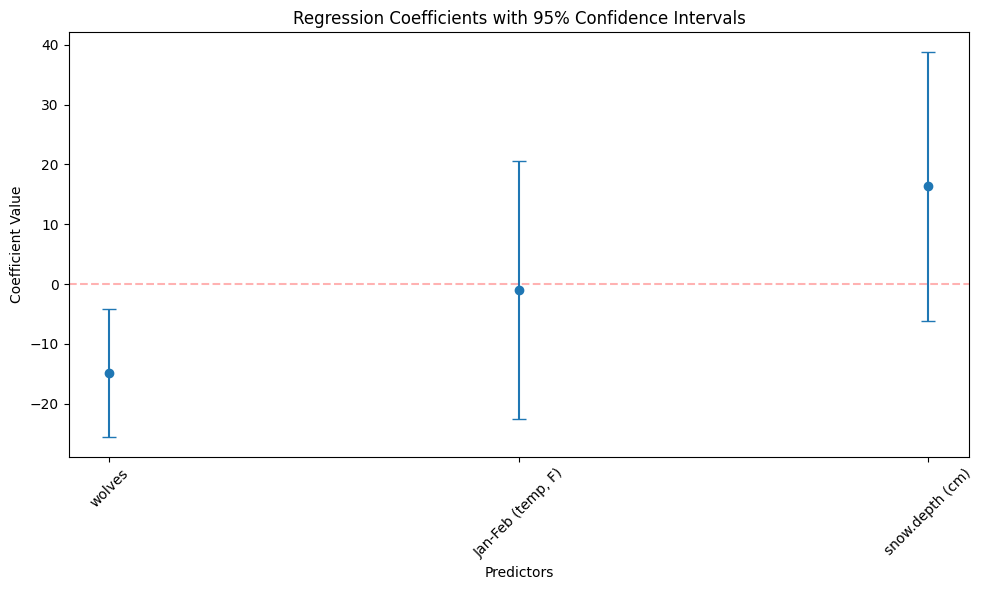

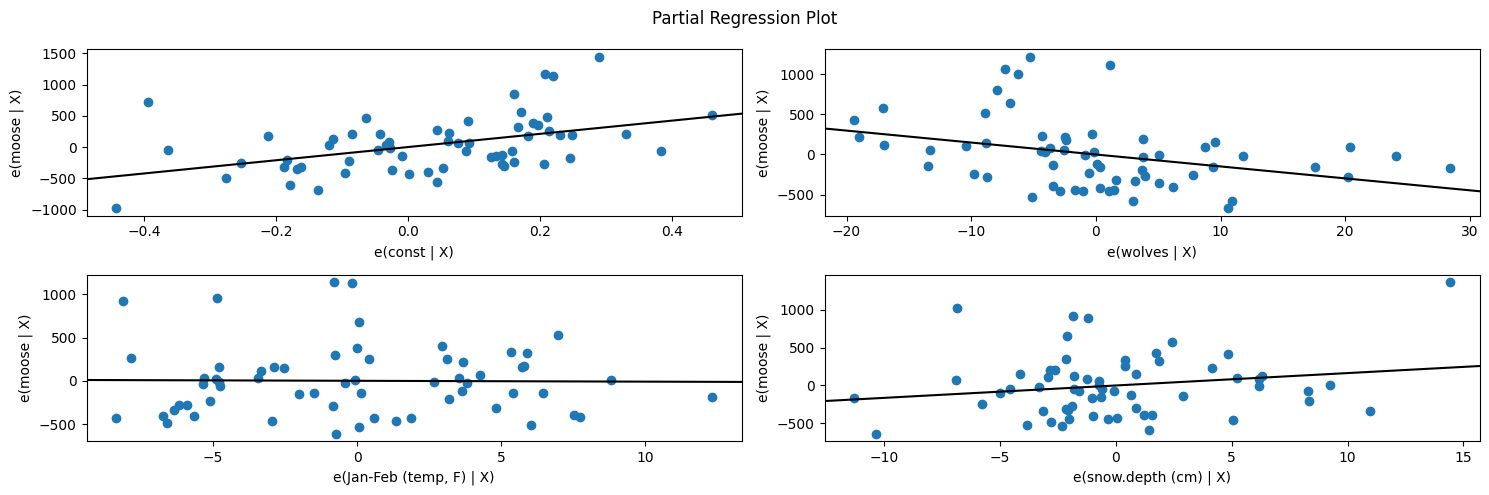

In [14]:
X = wolf_moose_filled[['wolves', 'Jan-Feb (temp, F)', 'snow.depth (cm)']]
y = wolf_moose_filled['moose']

X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()

print(model.summary())

conf_int = model.conf_int(alpha=0.05)
conf_int.columns = ['2.5%', '97.5%']
print("\nConfidence Intervals for Coefficients:")
print(conf_int)

plt.figure(figsize=(10, 6))
coefs = model.params[1:].values
names = model.params[1:].index
ci = model.conf_int(alpha=0.05)[1:]

plt.errorbar(range(len(coefs)), coefs,
            yerr=[(coefs-ci[0]), (ci[1]-coefs)],
            fmt='o', capsize=5)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.xticks(range(len(coefs)), names, rotation=45)
plt.ylabel('Coefficient Value')
plt.xlabel('Predictors')
plt.title('Regression Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 5))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

**The model coefficients are: an intercept of 1056.09, a coefficient of -14.88 for wolves, -0.97 for Jan to Feb temperature, and 16.35 for snow depth. This means that, holding other variables constant, for each additional wolf there are approximately 14.88 fewer moose, while each additional centimeter of snow depth corresponds to about 16.35 more moose, and each degree increase in winter temperature corresponds to about 0.97 fewer moose. Given the confidence intervals, the only statistic that is significant is the wolf one since it is the only one that doesn't include 0 in ther interval. The R^2 value is 0.153. This means that only 15% of the moose population variability is explained by these 3 predictors. While the wolf predictor is statistically significant, most of the variability is is unexplained by these 3 predictors.**

### Classification

#### Theory


**I would like to predict whether or not an ice bridge was present based on the winter temperature, the wolf population and the previous year's moose population.**

**I will use a decision tree to classify because it can handle both categorical and numerical variables, it provides rules that are interpretable, and it can model non-linear relationships.**

**Using a decision tree will allow me to test whether or not temperature is a primary determinant of ice bridges. We can tell if it appears high in the root. If wolf or moose population variables appear in the tree, we will also be able to tell if there is a relationship between those populations and the ice bridge.**

**We can use cross validation to evaluate the accuracy of this model. We can use the k-fold cross validation technique and this will work by seperating the data into 5 different folds. It will train the model on 4 folds and test it on the other one. It will repeat this 5 times. This will help ensure that our model is accurate.**

#### Application


Best parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score (accuracy): 0.7833333333333334
Cross-validation scores: [0.83333333 0.66666667 0.83333333 0.83333333 0.75      ]
Average accuracy: 0.783 ± 0.067

Feature Importance:
             Feature  Importance
0  Jan-Feb (temp, F)    0.943190
2         prev_moose    0.036662
1             wolves    0.020149


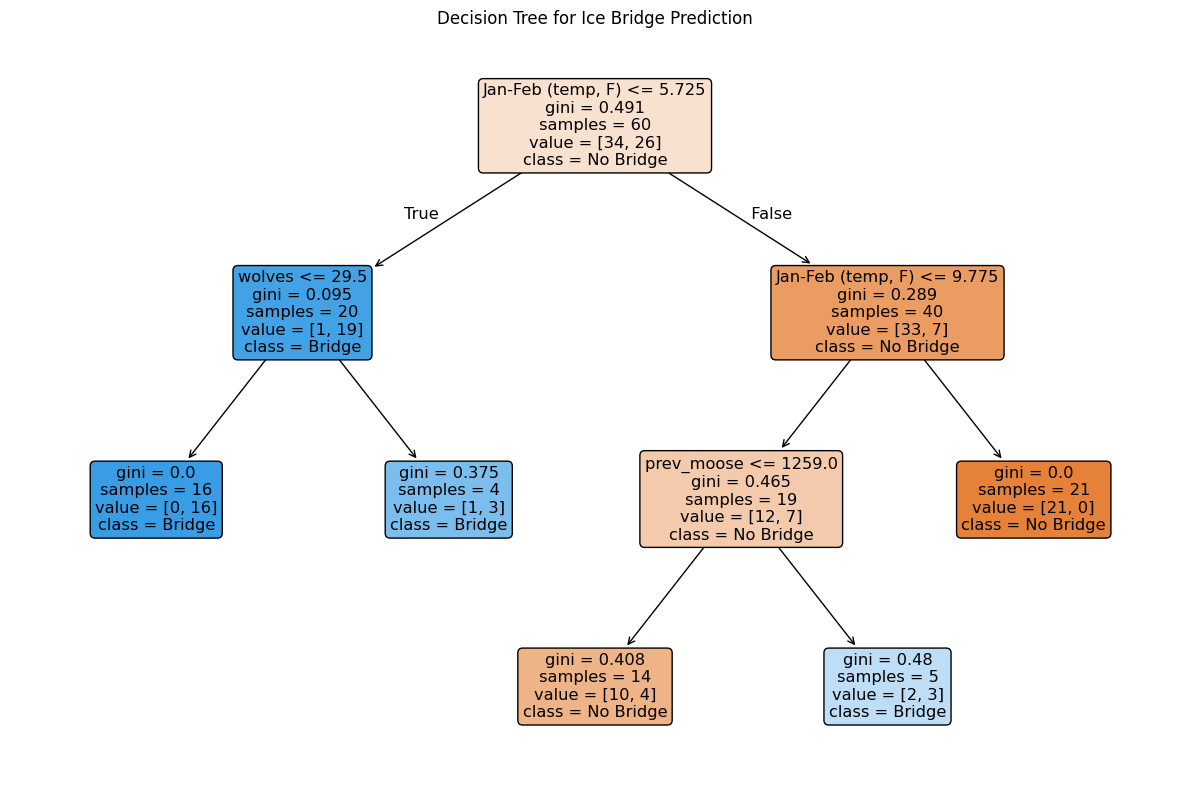


Predictions for Interesting Cases:
Very cold winter (-0°F), high wolf population (30), high moose population (1000):
Prediction: Bridge
Probability: [0.25 0.75]

Warmer winter (20°F), low wolf population (10), moderate moose population (500):
Prediction: No Bridge
Probability: [1. 0.]

Average winter (10°F), moderate wolf population (20), high moose population (800):
Prediction: No Bridge
Probability: [1. 0.]


In [15]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
wolf_moose_filled['prev_moose'] = wolf_moose_filled['moose'].shift(1)

model_data = wolf_moose_filled.dropna(subset=['prev_moose'])

X = model_data[['Jan-Feb (temp, F)', 'wolves', 'prev_moose']]
y = model_data['ice_bridge']

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best cross-validation score (accuracy):", grid_search.best_score_)

cv_scores = cross_val_score(best_model, X, y, cv=kfold, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average accuracy: {:.3f} ± {:.3f}".format(cv_scores.mean(), cv_scores.std()))

best_model.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Bridge', 'Bridge'],rounded=True)
plt.title("Decision Tree for Ice Bridge Prediction")
plt.tight_layout()
plt.show()

print("\nPredictions for Interesting Cases:")

cold_case = pd.DataFrame({'Jan-Feb (temp, F)': [0], 'wolves': [30], 'prev_moose': [1000]})
print("Very cold winter (-0°F), high wolf population (30), high moose population (1000):")
print("Prediction:", "Bridge" if best_model.predict(cold_case)[0] == 1 else "No Bridge")
print("Probability:", best_model.predict_proba(cold_case)[0])

warm_case = pd.DataFrame({'Jan-Feb (temp, F)': [20], 'wolves': [10], 'prev_moose': [500]})
print("\nWarmer winter (20°F), low wolf population (10), moderate moose population (500):")
print("Prediction:", "Bridge" if best_model.predict(warm_case)[0] == 1 else "No Bridge")
print("Probability:", best_model.predict_proba(warm_case)[0])

avg_case = pd.DataFrame({'Jan-Feb (temp, F)': [10], 'wolves': [20], 'prev_moose': [800]})
print("\nAverage winter (10°F), moderate wolf population (20), high moose population (800):")
print("Prediction:", "Bridge" if best_model.predict(avg_case)[0] == 1 else "No Bridge")
print("Probability:", best_model.predict_proba(avg_case)[0])

**According to the model, the best predictor of whether or not there was an ice bridge was the tempreature. The previous year's moose population and the wolf population had very like effect. This is interesting since it wouldn't be unreasonable to assume that with an ice bridge, some wolves or moose may move somewhere else. From this data, we learned this is not the case.**

## Conclusion


**We learned through hypothesis testing that there is a statistically significant negative correlation between wolf and moose populations. This confirms that the wolves are eating the moose. Through multiple regression analysis, we learned that only the wolf population is a significant predictor of moose population. Winter temperature and snow depth were not. Each additional wolf corresponds to approximately 14.88 fewer moose. Even though the relationship is statistically significant the wolf population only accounts for about 15% of the variation in the moose population. We also learned, through a categorial-numeric analysis that ice-bridges did not impact the mean kill rate of moose. This was very interesting since I assumed the ice bridges would help the moose escape. I also corroborated this through the classifcation and cross-validation. The most significant indicator of whether or not there was an ice bridge was the temperature, not the moose population. Another thing I found interesting was that approximately the same number of males and females died every year. One thing that was not as surprising was that the distribution of cranial volumes was approximately normal. This follows what we learned from the central limit theorem.**

**I think that in the future, we need to better capture enviromental variables so we can look at how this affects the moose population better. I think that we should look deeper into what causes moose deaths. Which I am now assuming that the wolves are directly killing the moose, it could also be possible that the wolves are killing what the moose eat and indirectly killing the moose. This also relates to another idea I have which is to document the vegetation quantity and quality to see if that impacting the life span of the moose, how fast they can run and whether or not it is killing them.**

**Specifically, i would like to know more about whether or not there is a "tipping point" in the predator-prey relationship, where if there is not enough moose, some wolves would die and cause a big food chain effect. I also would like to understand that, if there is an ice bridge, why moose wouldn't leave the island if they are being killed off in significant numbers by the moose. Why don't more wolves come in to eat the moose? Overall, analyzing the data has shown me some things that were not intuitive and did not expect.**